In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Nerual example

In [2]:
Num_features = 8
Num_neurons = 4

In [4]:
# creating placeholders for data
x = tf.placeholder(tf.float32,(None,Num_features))
# creating variable for weights and bias
W = tf.Variable(tf.random_uniform([Num_features,Num_neurons]))
b = tf.Variable(tf.ones([Num_neurons]))

In [7]:
xW = tf.matmul(x,W)
z = tf.add(xW,b)
#apply sigmoid for activation
a = tf.sigmoid(z)
#initialize the global variables
init = tf.global_variables_initializer()

In [9]:
#Start the session
with tf.Session() as sess:
    sess.run(init)
    result = sess.run(a,feed_dict={x:np.random.random([2,Num_features]) })
    

In [10]:
print(result)

[[0.9439732  0.95141447 0.95499843 0.96128243]
 [0.94909453 0.95513135 0.93186915 0.90591794]]


## Regression example 

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


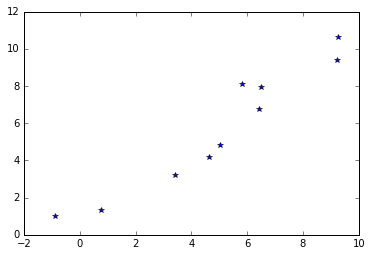

In [20]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
plt.plot(x_data,y_label,'*')

In [13]:
#create the tf variables
m = tf.Variable(0.45)
b = tf.Variable(0.76)
error = 0

In [14]:
#create the objective function and then iterate over the samples to find squared error
for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    
    error += (y - y_hat)**2
    

In [38]:
init = tf.global_variables_initializer()
#apply optimization for the error 
optizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optizer.minimize(error)


In [39]:
with tf.Session() as sess:
    sess.run(init)
    train_steps = 100
    for i in range(train_steps):
        sess.run(train)
        
    final_m , final_b = sess.run([m,b])

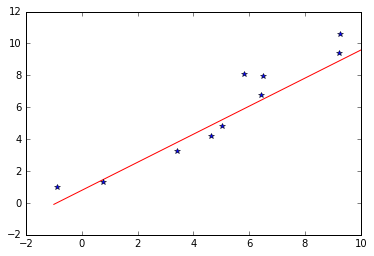

In [40]:
x_test = np.linspace(-1,10,10)
#cal prediction
y_pred = final_m*x_test + final_b

#plot both
plt.plot(x_test,y_pred,'r')
plt.plot(x_data,y_label,'*')

## Realistic Regression 
##### tf.estimator introduced !

In [42]:
import pandas as pd